# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Lab/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use MATPLOTLIB ```scatter``` plots and ```subfigures```.

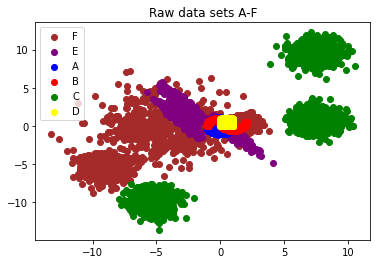

In [48]:
fig, ax = plt.subplots()

ax.scatter(F[:,0],F[:,1],color="brown", lw=1 , ls='-', marker='o', label="F")
ax.scatter(E[:,0],E[:,1],color="purple", lw=1 , ls='-', marker='o', label="E")
ax.scatter(A[:,0],A[:,1],color="blue", lw=1 , ls='-', marker='o', label="A")
ax.scatter(B[:,0],B[:,1],color="red", lw=1 , ls='-', marker='o', label="B")
ax.scatter(C[:,0],C[:,1],color="green", lw=1 , ls='-', marker='o', label="C")
ax.scatter(D[:,0],D[:,1],color="yellow", lw=1 , ls='-', marker='o', label="D")

ax.legend(loc=2);
#ax.set_xlabel('Month Number')
#ax.set_ylabel('Sales units in number')
ax.set_title('Raw data sets A-F');
#ax.set_ylim([900, 18000])
#ax.set_xlim([0.5, 12.5])

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

### Lösung 2.1

In [24]:
from sklearn.cluster import KMeans

In [40]:
k=20
AonKMeans=KMeans(n_clusters=k, n_jobs=-1)#parallelize to all cores
BonKMeans=KMeans(n_clusters=k, n_jobs=-1)#parallelize to all cores
ConKMeans=KMeans(n_clusters=k, n_jobs=-1)#parallelize to all cores
DonKMeans=KMeans(n_clusters=k, n_jobs=-1)#parallelize to all cores
EonKMeans=KMeans(n_clusters=k, n_jobs=-1)#parallelize to all cores
FonKMeans=KMeans(n_clusters=k, n_jobs=-1)#parallelize to all cores

In [41]:
#train model
AonKMeans.fit(A)

C:\Users\togie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=20, n_jobs=-1)

In [42]:
#train model
BonKMeans.fit(B)

C:\Users\togie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=20, n_jobs=-1)

In [43]:
#train model
ConKMeans.fit(C)

C:\Users\togie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=20, n_jobs=-1)

In [44]:
#train model
DonKMeans.fit(D)

C:\Users\togie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=20, n_jobs=-1)

In [45]:
#train model
EonKMeans.fit(E)

C:\Users\togie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=20, n_jobs=-1)

In [46]:
#train model
FonKMeans.fit(F)

C:\Users\togie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=20, n_jobs=-1)

In [27]:
#get cluster centers
centers=myKMeans.cluster_centers_
labels=myKMeans.labels_

TypeError: float() argument must be a string or a number, not 'KMeans'

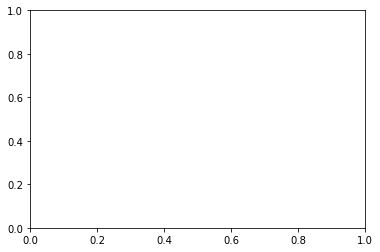

In [51]:
plt.plot(FonKMeans)

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN
